<a href="https://colab.research.google.com/github/Joshclone/Data-analysis-Airline-Project/blob/main/Britavia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAV – Britavia International Airlines Report

**Objective**: Using Machine learning principles (Random Forest and Logistic Regression) to model and visualise key data with a view to helping staff better
understand what factors impacted levels of ‘satisfaction’ for passengers using the airline.

Importing the necessary libraries (NumPy and Pandas) for creating and storing data in a dataframe as a Python object with Pandas and performing tabular functions with Numpy. Seaborn,Matplotlib and Plotly Express for visualisations. Scikit-learn is a Python module for machine learning

In [ ]:
###Importing the necessary libraries
import random
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    log_loss,
)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set_style("whitegrid")

##Set the seed for reproducibility
random.seed(123)

Extract, Transform, and Load (ETL) process: Import, Clean, and Prepare the Data.

In [ ]:
# Load the dataset

df = pd.read_csv("/content/BRITAVIA.csv", encoding='latin-1')


In [ ]:
# Display the first few rows

df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# Display the last few rows

df.tail()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
103899,103899,94171,Female,N,23,18 to 24,Business travel,Eco,4760,India,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,Male,Y,49,45 to 54,Business travel,Business,4760,India,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,Male,N,30,25 to 34,Business travel,Business,4760,India,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,Female,N,22,18 to 24,Business travel,Eco,4760,India,...,1,1,4,5,1,5,4,1,0,0.0
103903,103903,62567,Male,Y,27,25 to 34,Business travel,Business,4760,India,...,1,1,1,1,4,4,3,1,0,0.0


In [ ]:
###Check the shape of the dataset

df.shape

(103904, 27)

**The dataset shows 103904 rows and 27 columns**

In [ ]:
# Get basic information about the dataset

print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi ser

In [ ]:
##Summary statistics of the data

df.describe()

,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**DATA CLEANING**

In [ ]:
####Let's check for duplicates in the dataset

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service         

**As seen above 310 missing values was observed in the "Arrival Delay in Minutes" column**

In [ ]:
###Fill missing values in 'Arrival Delay in Minutes' with mean

mean_arrival_delay = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

In [ ]:
###After filling the missing values with the mean value, then check again to be
## sure the values have been filled

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                     

In [ ]:
# Drop unnecessary columns like the "Ref Number" and "id Number"

df.drop(["Ref", "id"], axis=1, inplace=True)

**EXPLORATORY DATA ANALYSIS**

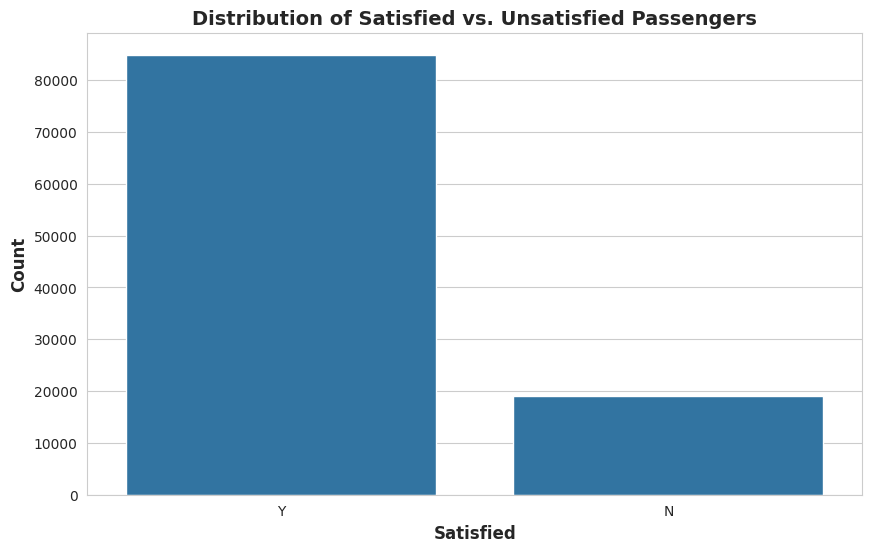

In [ ]:
# Visualization of the Distribution of 'Satisfied' (Target Variable)

plt.figure(figsize=(10, 6))
sns.countplot(x="Satisfied", data=df)
plt.title("Distribution of Satisfied vs. Unsatisfied Passengers",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

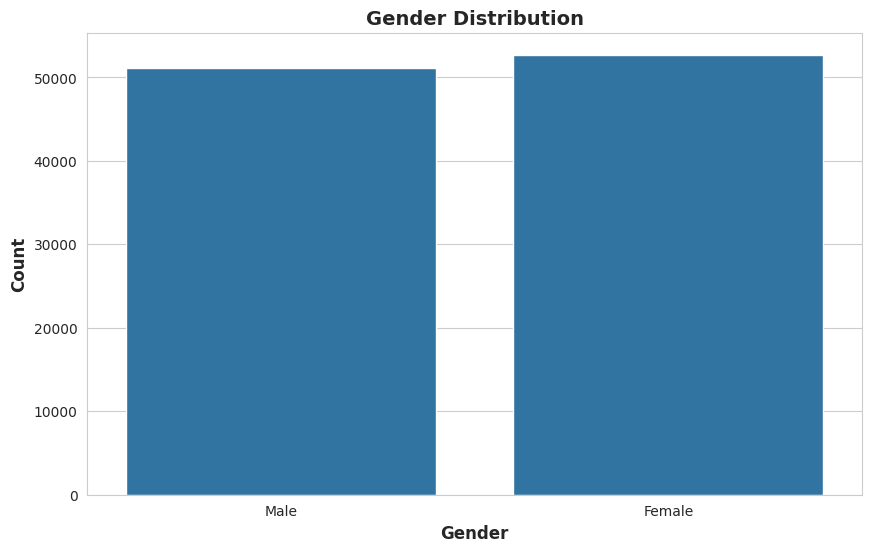

In [ ]:
# Visualization of the Gender Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Gender",fontsize=12, fontweight='bold')
plt.ylabel("Count",fontsize=12, fontweight='bold')
plt.show()

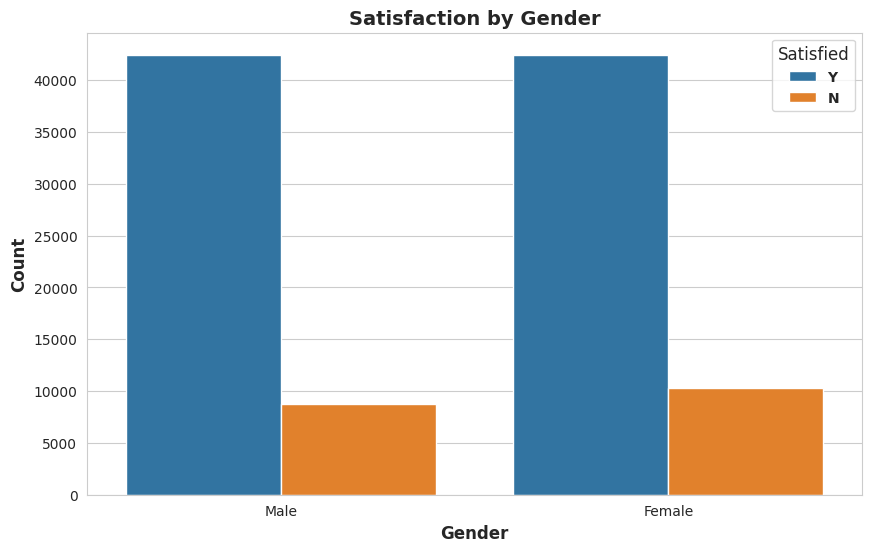

In [ ]:
# Visualization of the Satisfaction by Gender

plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Satisfied", data=df)
plt.title("Satisfaction by Gender",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Gender", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied", loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

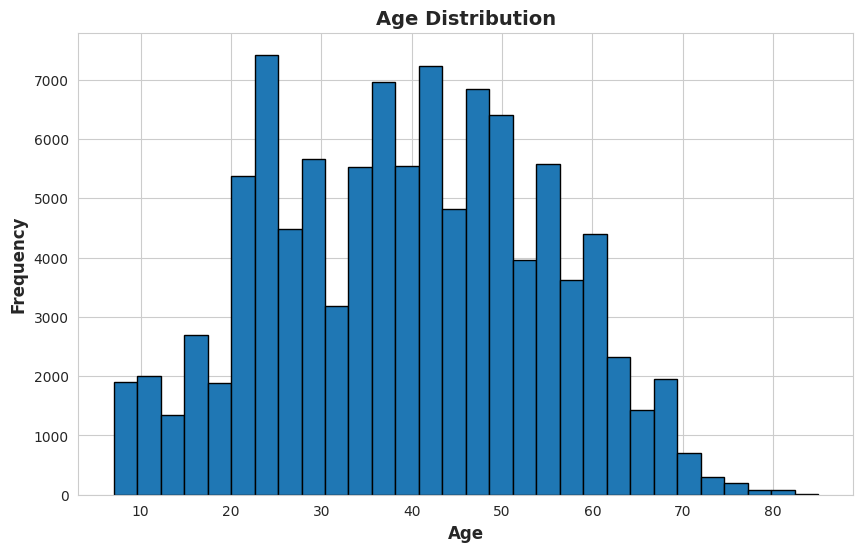

In [ ]:
# Visualization of Age Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=30, edgecolor="k")
plt.title("Age Distribution",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Age", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

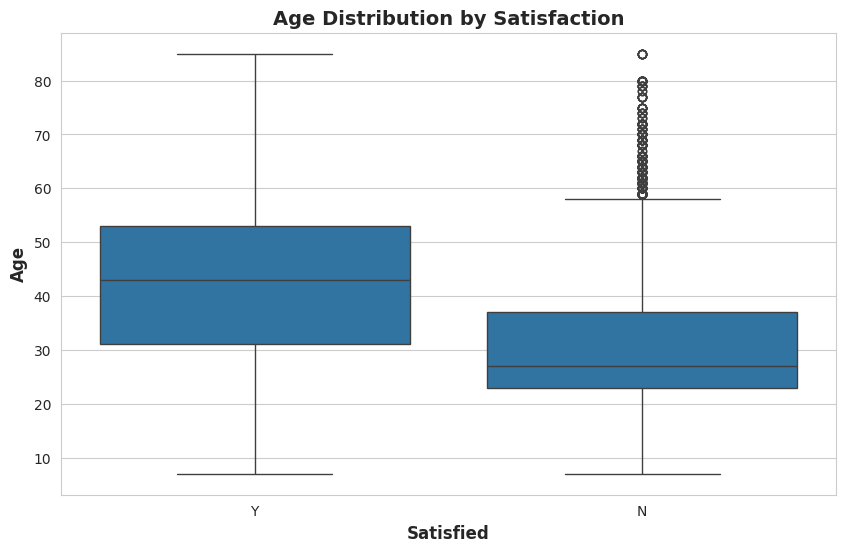

In [ ]:
# Visualization of the Satisfaction by Age

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Age", data=df)
plt.title("Age Distribution by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Age", fontsize=12, fontweight='bold')
plt.show()

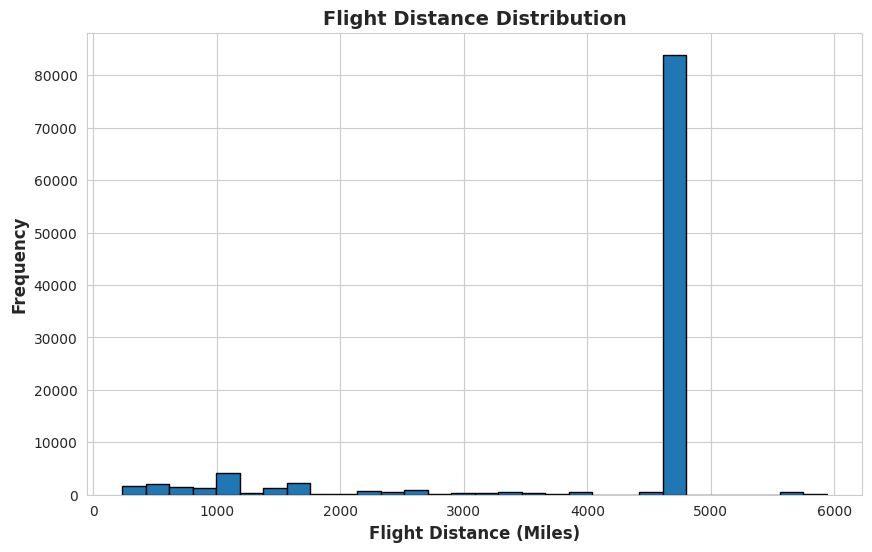

In [ ]:
# Visualization of the Flight Distance Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Flight Distance"], bins=30, edgecolor="k")
plt.title("Flight Distance Distribution", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Flight Distance (Miles)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

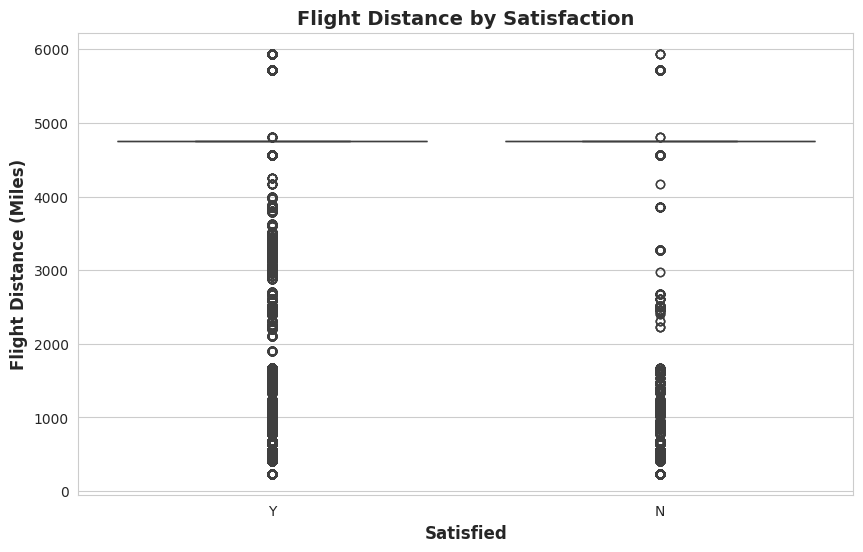

In [ ]:
# Visualization of the Satisfaction by Flight Distance

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Flight Distance", data=df)
plt.title("Flight Distance by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Flight Distance (Miles)", fontsize=12, fontweight='bold')
plt.show()

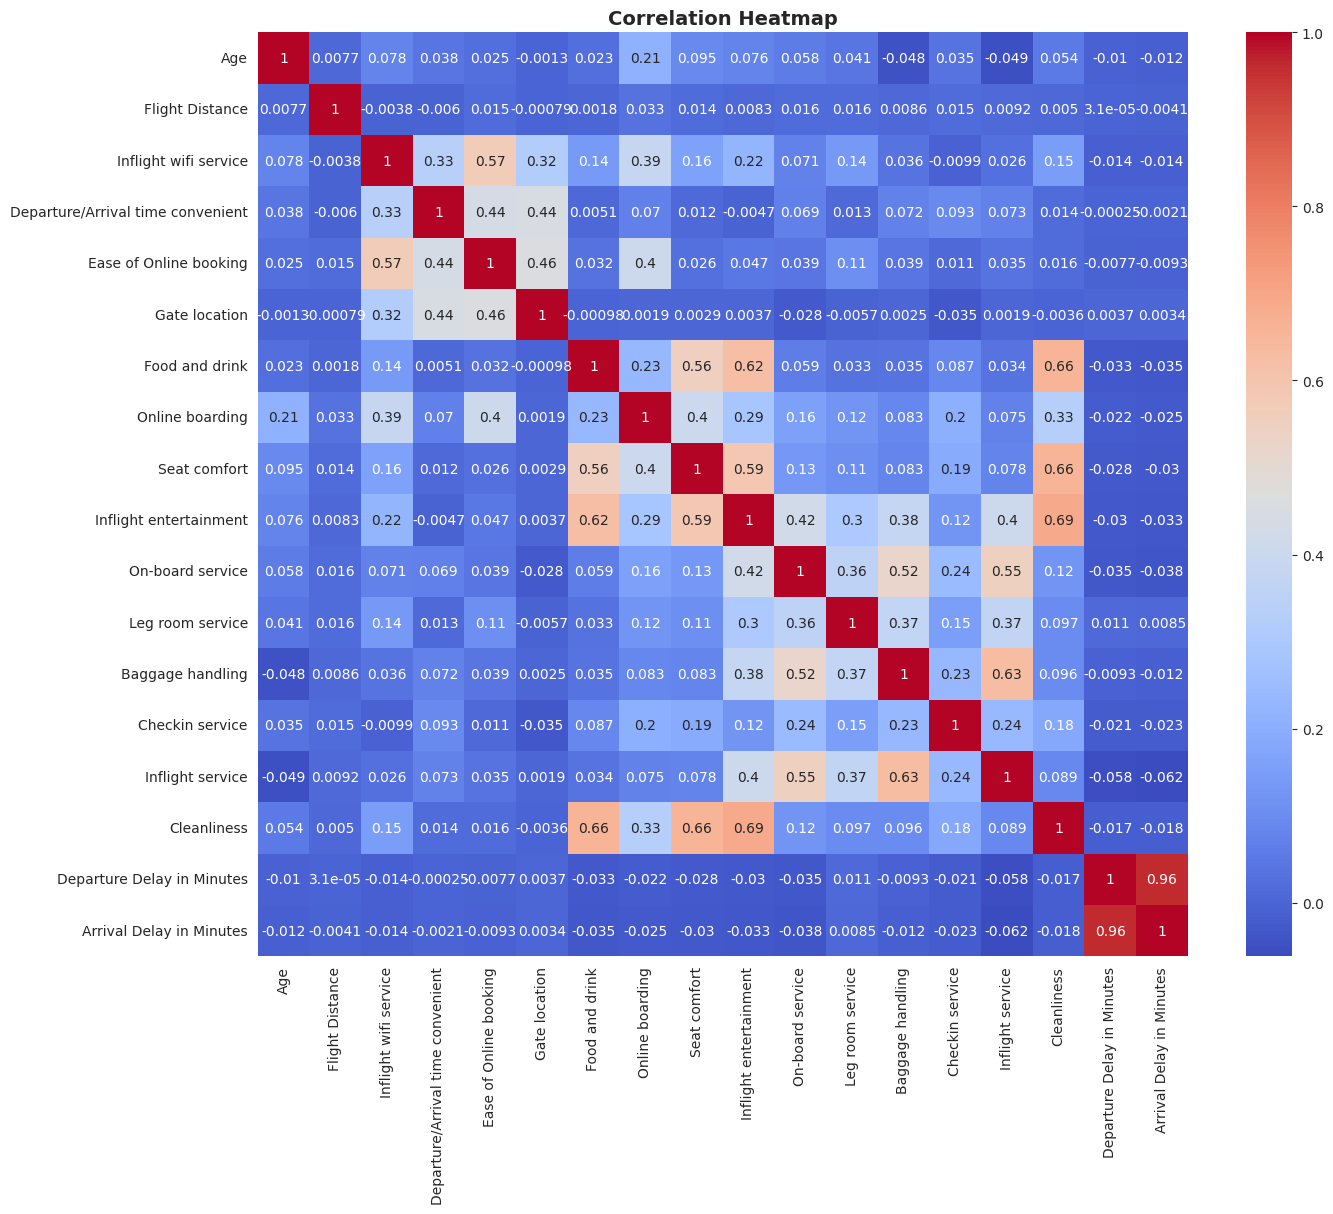

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(15, 12))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap", {'fontsize': 14, 'fontweight': 'bold'})
plt.show()

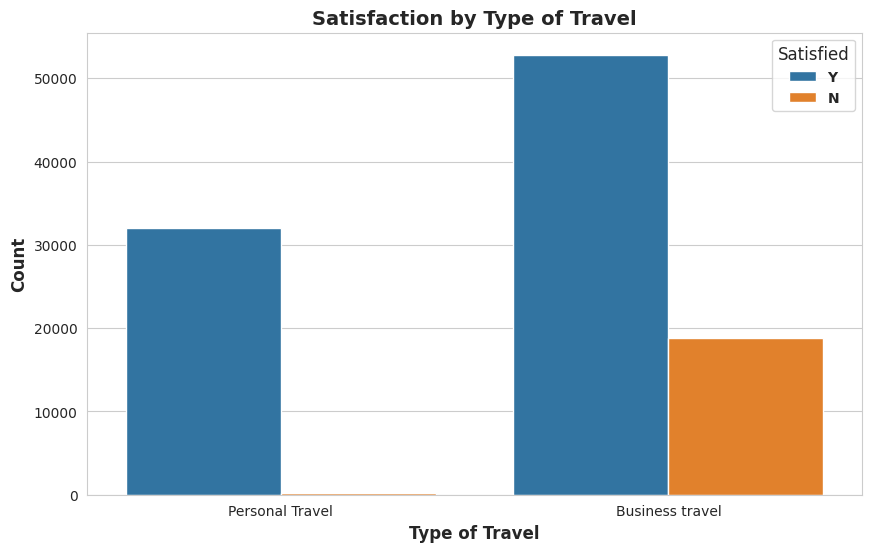

In [ ]:
# Visualization of the Satisfaction by Type of Travel

plt.figure(figsize=(10, 6))
sns.countplot(x="Type of Travel", hue="Satisfied", data=df)
plt.title("Satisfaction by Type of Travel", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Type of Travel",fontsize=12, fontweight='bold')
plt.ylabel("Count",fontsize=12, fontweight='bold')
plt.legend(title="Satisfied",loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

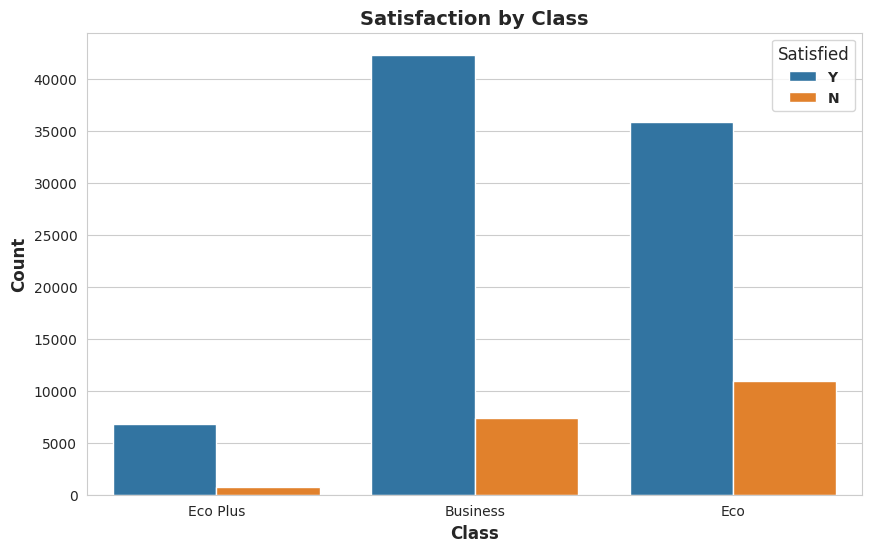

In [ ]:
# Visualization of Satisfaction by Class

plt.figure(figsize=(10, 6))
sns.countplot(x="Class", hue="Satisfied", data=df)
plt.title("Satisfaction by Class", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Class", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied",loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

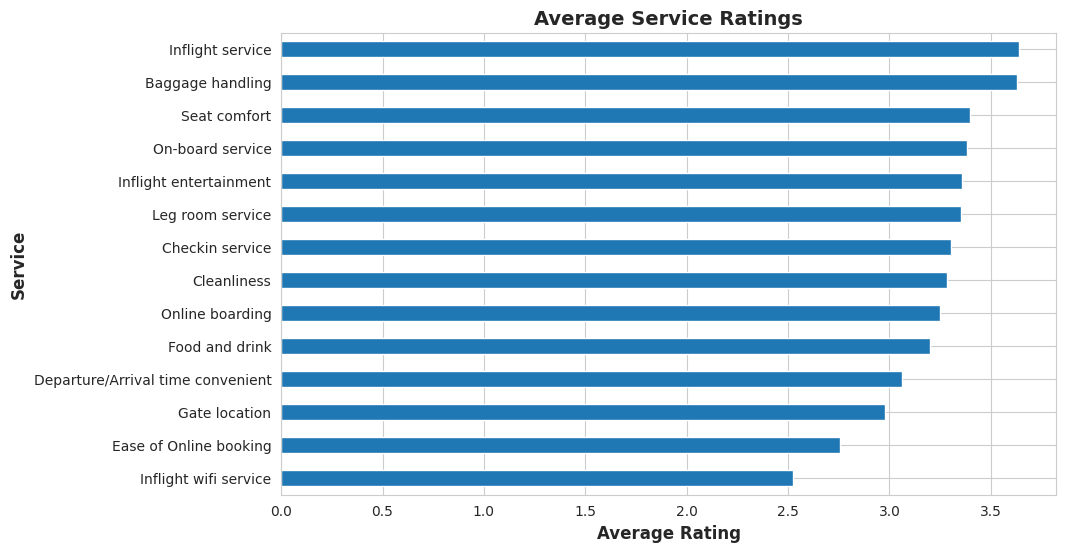

In [ ]:
# Visualization of the Average Ratings of Services
service_ratings = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
]
plt.figure(figsize=(10, 6))
avg_ratings = df[service_ratings].mean().sort_values()
avg_ratings.plot(kind="barh")
plt.title("Average Service Ratings",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Average Rating", fontsize=12, fontweight='bold')
plt.ylabel("Service", fontsize=12, fontweight='bold')
plt.show()

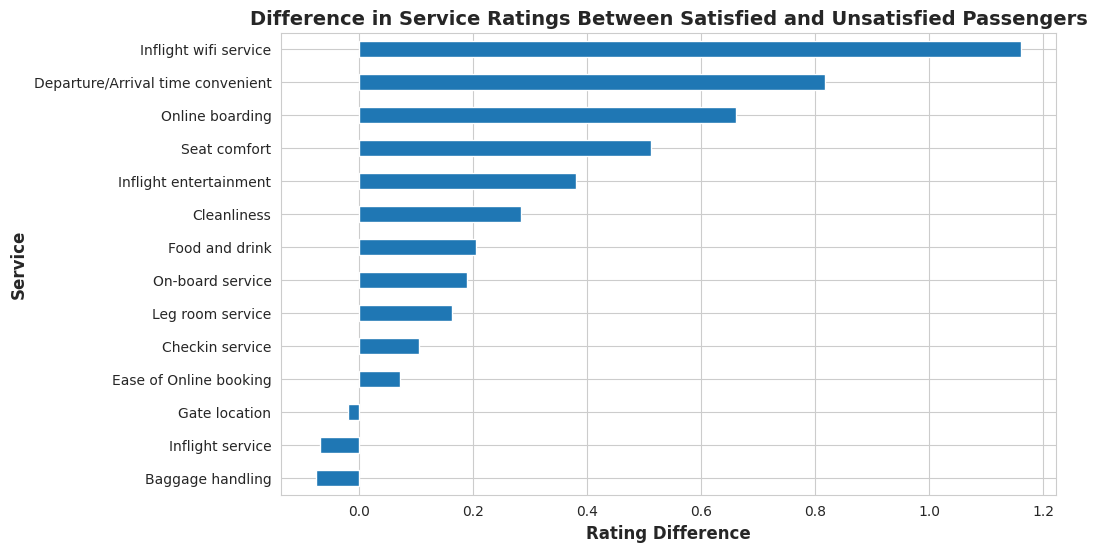

In [ ]:
# Visualization of the Service Ratings by Satisfaction
satisfied = df[df["Satisfied"] == 'Y']
unsatisfied = df[df["Satisfied"] == 'N']
satisfied_mean = satisfied[service_ratings].mean()
unsatisfied_mean = unsatisfied[service_ratings].mean()
rating_difference = pd.DataFrame(
    {"Satisfied": satisfied_mean, "Unsatisfied": unsatisfied_mean}
)
rating_difference["Difference"] = (
    rating_difference["Satisfied"] - rating_difference["Unsatisfied"]
)
plt.figure(figsize=(10, 6))
rating_difference["Difference"].sort_values().plot(kind="barh")
plt.title("Difference in Service Ratings Between Satisfied and Unsatisfied Passengers", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Rating Difference", fontsize=12, fontweight='bold')
plt.ylabel("Service", fontsize=12, fontweight='bold')
plt.show()

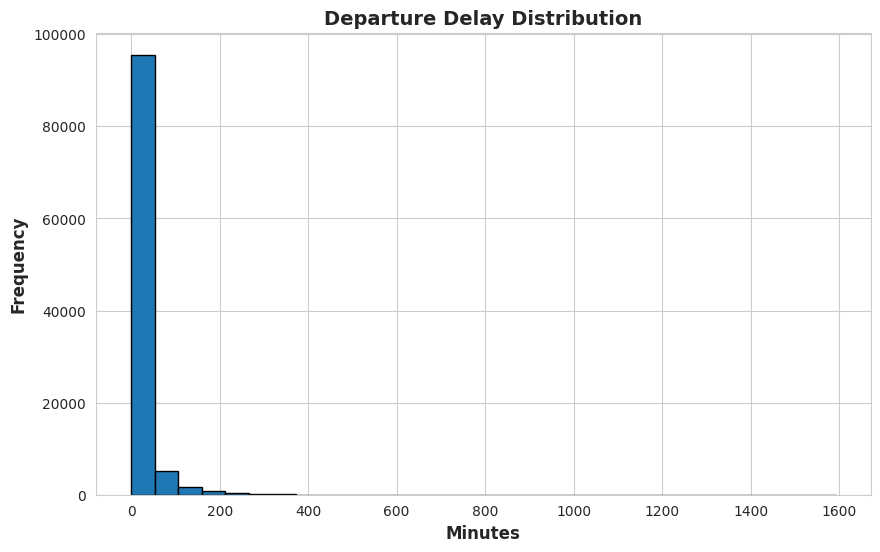

In [ ]:
# Visualization of the Departure Delay Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Departure Delay in Minutes"], bins=30, edgecolor="k")
plt.title("Departure Delay Distribution", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Minutes", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

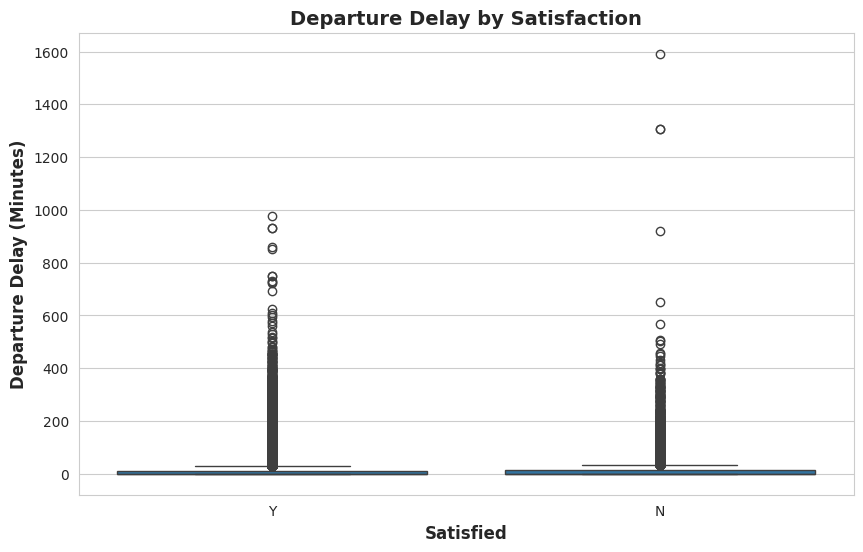

In [ ]:
# Visualization of Satisfaction vs. Departure Delay

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Departure Delay in Minutes", data=df)
plt.title("Departure Delay by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Departure Delay (Minutes)", fontsize=12, fontweight='bold')
plt.show()

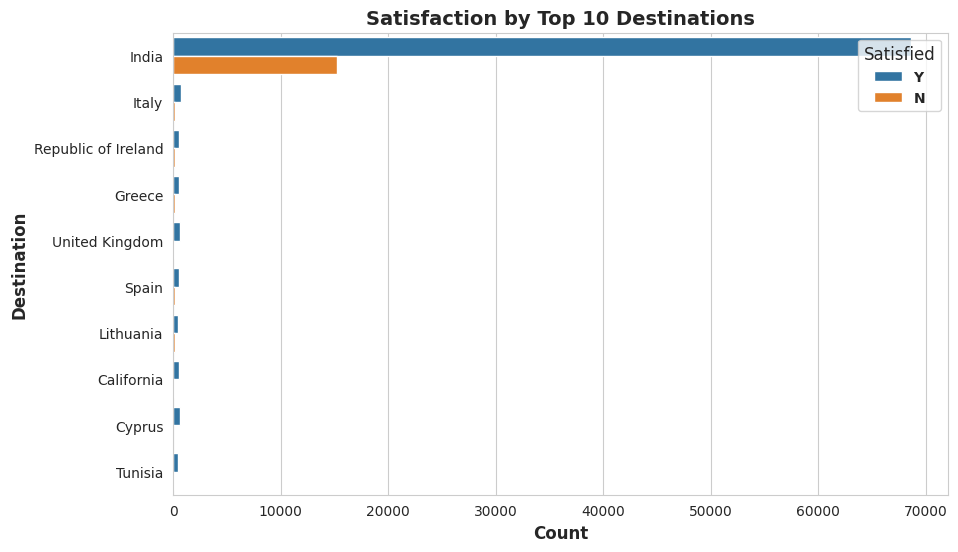

In [ ]:
# Visualization of the Satisfaction by Destination (Top 10)

top_destinations = df["Destination"].value_counts().head(10).index
top_dest_data = df[df["Destination"].isin(top_destinations)]
plt.figure(figsize=(10, 6))
sns.countplot(
    y="Destination",
    hue="Satisfied",
    data=top_dest_data,
    order=top_destinations,
)
plt.title("Satisfaction by Top 10 Destinations", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Count", fontsize=12, fontweight='bold')
plt.ylabel("Destination", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied", loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

In [ ]:
# Visualization of the World Map Showing Number of Passengers per Destination Country

# Create a DataFrame with counts per destination country
destination_counts = df['Destination'].value_counts().reset_index()
destination_counts.columns = ['Country', 'Passenger Count']


# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    destination_counts,
    locations='Country',
    locationmode='country names',
    color='Passenger Count',
    color_continuous_scale='Blues',
    title='Number of Passengers per Destination Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":50,"l":0,"b":0},
    title={'font_size': 14, 'font_family': 'bold'} # Set title font size and family here
)

fig.show()


In [ ]:
# Visualization of the World Map Showing Average Satisfaction per Destination Country

# Calculate average satisfaction per destination
destination_satisfaction = df.groupby('Destination')['Satisfied'].apply(lambda x: x.map({'satisfied': 1, 'not satisfied': 0}).mean()).reset_index()
destination_satisfaction.columns = ['Country', 'Average Satisfaction']

# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    destination_satisfaction,
    locations='Country',
    locationmode='country names',
    color='Average Satisfaction',
    color_continuous_scale='RdYlGn',
    range_color=(0, 1),
    title='Average Passenger Satisfaction per Destination Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()



In [ ]:
# Visualization 19: Bubble Map of Flight Distance vs. Satisfaction by Destination

# Calculate average flight distance and satisfaction per destination
destination_stats = df.groupby('Destination').agg({
    'Flight Distance': 'mean',
    'Satisfied': lambda x: x.map({'satisfied': 1, 'not satisfied': 0}).mean(),
    'Destination': 'count'
}).rename(columns={'Destination': 'Passenger Count'}).reset_index()

# Use Plotly Express to create a bubble map
fig = px.scatter_geo(
    destination_stats,
    locations='Destination',
    locationmode='country names',
    color='Satisfied',
    size='Passenger Count',
    hover_name='Destination',
    projection='natural earth',
    title='Flight Distance vs. Satisfaction by Destination',
    color_continuous_scale='RdYlGn',
    size_max=30
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title='Avg Satisfaction')
)

fig.show()


**Data preparation for Modelling**

In [ ]:
# Map 'Gender' column: Male to 1, Female to 0
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [ ]:
# Handle categorical variables using One-Hot Encoding
categorical_cols = [
    "Type of Travel",
    "Class",
    "Destination",
    "Continent",
    "Age Band",
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [ ]:
# Define features and target variable

X = df.drop("Satisfied", axis=1)
y = df["Satisfied"]

**Data Splitting**

The data is splitted into Training (80%), Validation (10%), and Test Sets (10%)

In [ ]:
# First, split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Then, split the temporary set equally into validation and test sets (10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

**Feature Scaling (Normalization)**

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Class Balancing using SMOTE**

In [ ]:
# Check the original class distribution
print('Original training set shape:', Counter(y_train))

Original training set shape: Counter({'Y': 67936, 'N': 15187})


In [ ]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print('Resampled training set shape:', Counter(y_train_res))


Resampled training set shape: Counter({'Y': 67936, 'N': 67936})


**THE TWO ANALYTICAL MODELS IS SEEN BELOW**

**RANDOM FOREST MODEL AND LOGISTIC REGRESSION**

In [ ]:
# Initialize the Random Forest Classifier

rfc = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data

rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled training data
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

**Model Evaluation of the two analytical models**

The Model will be evaluated on the Validation and Test set

In [ ]:
# Predict on the validation set for Random Forest
y_val_pred = rfc.predict(X_val_scaled)
y_val_proba = rfc.predict_proba(X_val_scaled)

In [ ]:
# Evaluate the model on validation set

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, pos_label='Y')
val_recall = recall_score(y_val, y_val_pred, pos_label='Y')
val_f1 = f1_score(y_val, y_val_pred, pos_label='Y')
val_log_loss = log_loss(y_val, y_val_proba)
val_roc_auc_rf = roc_auc_score(y_val, y_val_proba[:, 1])

print("\nValidation Set Evaluation:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-Score:", val_f1)
print("Log Loss:", val_log_loss)
print("ROC AUC Score:", val_roc_auc_rf)
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Set Evaluation:
Accuracy: 0.9844080846968238
Precision: 0.9893092105263158
Recall: 0.9916391898257183
F1-Score: 0.9904728299223712
Log Loss: 0.09077489132203712
ROC AUC Score: 0.995687536078089
Classification Report:
               precision    recall  f1-score   support

           N       0.96      0.95      0.96      1898
           Y       0.99      0.99      0.99      8492

    accuracy                           0.98     10390
   macro avg       0.98      0.97      0.97     10390
weighted avg       0.98      0.98      0.98     10390



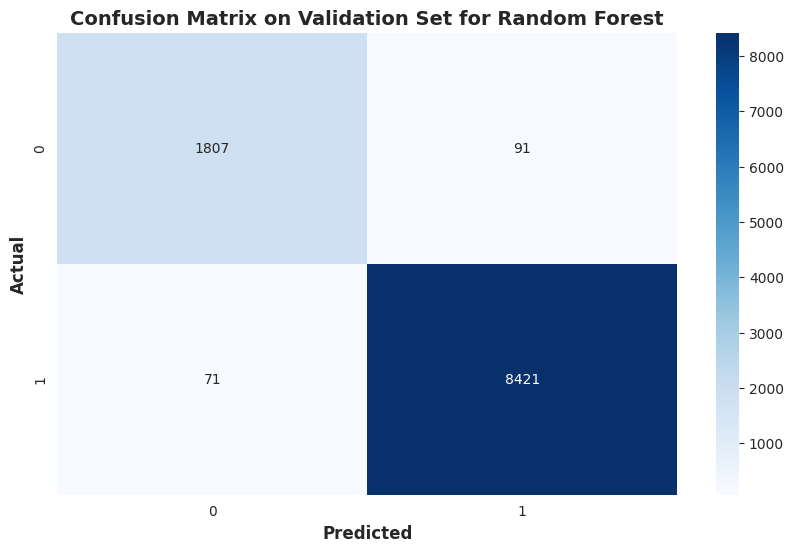

In [ ]:
# Confusion Matrix on Validation Set for Random Forest

plt.figure(figsize=(10, 6))
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix on Validation Set for Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Predicted", fontsize=12, fontweight='bold')
plt.ylabel("Actual", fontsize=12, fontweight='bold')
plt.show()

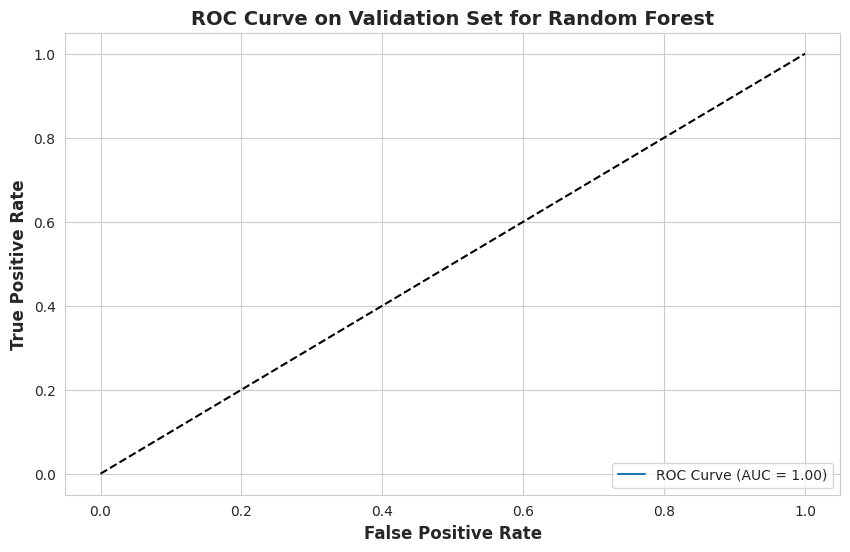

Validation ROC AUC Score: 0.995687536078089


In [ ]:
# ROC Curve on Validation Set for Random Forest

roc_auc_val = roc_auc_score(y_val, y_val_proba[:, 1])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_proba[:, 1], pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, label="ROC Curve (AUC = %0.2f)" % roc_auc_val)
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve on Validation Set for Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

print("Validation ROC AUC Score:", roc_auc_val)

In [ ]:
# Predict on the validation set for Logistic Regression

y_val_pred_lr = lr.predict(X_val_scaled)
y_val_proba_lr = lr.predict_proba(X_val_scaled)

In [ ]:
# Evaluate the Logistic Regression model on validation set

val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
val_precision_lr = precision_score(y_val, y_val_pred_lr, pos_label='Y')
val_recall_lr = recall_score(y_val, y_val_pred_lr, pos_label='Y')
val_f1_lr = f1_score(y_val, y_val_pred_lr, pos_label='Y')
val_log_loss_lr = log_loss(y_val, y_val_proba_lr)
val_roc_auc_lr = roc_auc_score(y_val, y_val_proba_lr[:, 1])

print("\nValidation Set Evaluation (Logistic Regression):")
print("Accuracy:", val_accuracy_lr)
print("Precision:", val_precision_lr)
print("Recall:", val_recall_lr)
print("F1-Score:", val_f1_lr)
print("Log Loss:", val_log_loss_lr)
print("ROC AUC Score:", val_roc_auc_lr)
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr))


Validation Set Evaluation (Logistic Regression):
Accuracy: 0.9064485081809432
Precision: 0.9861649857770882
Recall: 0.8981394253414979
F1-Score: 0.9400961419943301
Log Loss: 0.2601965363579705
ROC AUC Score: 0.9593957394723949
Classification Report:
               precision    recall  f1-score   support

           N       0.67      0.94      0.79      1898
           Y       0.99      0.90      0.94      8492

    accuracy                           0.91     10390
   macro avg       0.83      0.92      0.86     10390
weighted avg       0.93      0.91      0.91     10390



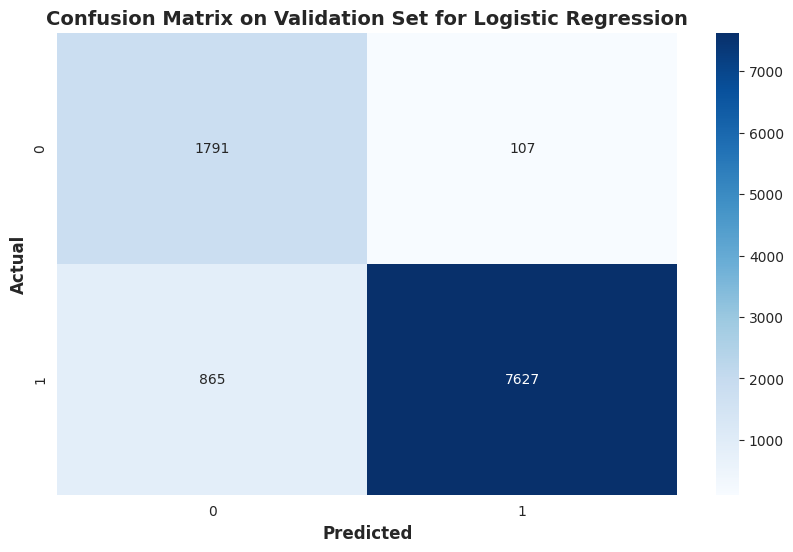

In [ ]:
# Confusion Matrix on Validation Set for Logistic Regression

plt.figure(figsize=(10, 6))
conf_matrix_val = confusion_matrix(y_val, y_val_pred_lr)
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix on Validation Set for Logistic Regression", fontsize=14, fontweight='bold')
plt.xlabel("Predicted", fontsize=12, fontweight='bold')
plt.ylabel("Actual", fontsize=12, fontweight='bold')
plt.show()

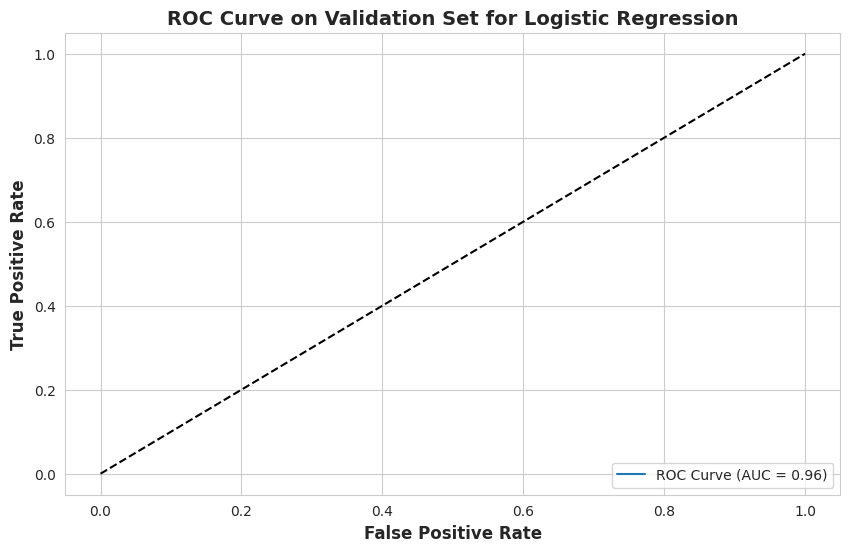

Validation ROC AUC Score: 0.9593957394723949


In [ ]:
# ROC Curve on Validation Set for Logistic Regression

roc_auc_val = roc_auc_score(y_val, y_val_proba_lr[:, 1])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_proba_lr[:, 1], pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, label="ROC Curve (AUC = %0.2f)" % roc_auc_val)
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve on Validation Set for Logistic Regression", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

print("Validation ROC AUC Score:", roc_auc_val)

**Model Evaluation on Test Set**

In [ ]:
# Predict on the test set (Random Forest)

y_test_pred_rf = rfc.predict(X_test_scaled)
y_test_proba_rf = rfc.predict_proba(X_test_scaled)

In [ ]:
# Evaluate the Random Forest model on test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, pos_label='Y')
test_recall_rf = recall_score(y_test, y_test_pred_rf, pos_label='Y')
test_f1_rf = f1_score(y_test, y_test_pred_rf, pos_label='Y')
test_log_loss_rf = log_loss(y_test, y_test_proba_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf[:, 1])

print("\nTest Set Evaluation (Random Forest):")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1-Score:", test_f1_rf)
print("Log Loss:", test_log_loss_rf)
print("ROC AUC Score:", test_roc_auc_rf)
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Test Set Evaluation (Random Forest):
Accuracy: 0.9836396881917043
Precision: 0.9876933895921237
Recall: 0.99234573716439
F1-Score: 0.9900140977443609
Log Loss: 0.08605216526650138
ROC AUC Score: 0.9961048430924176
Classification Report:
               precision    recall  f1-score   support

           N       0.97      0.94      0.95      1899
           Y       0.99      0.99      0.99      8492

    accuracy                           0.98     10391
   macro avg       0.98      0.97      0.97     10391
weighted avg       0.98      0.98      0.98     10391



In [ ]:
# Predict on the test set for Logistic Regression

y_test_pred_lr = lr.predict(X_test_scaled)
y_test_proba_lr = lr.predict_proba(X_test_scaled)

In [ ]:
# Evaluate the Logistic Regression model on test set
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr, pos_label='Y')
test_recall_lr = recall_score(y_test, y_test_pred_lr, pos_label='Y')
test_f1_lr = f1_score(y_test, y_test_pred_lr, pos_label='Y')
test_log_loss_lr = log_loss(y_test, y_test_proba_lr)
test_roc_auc_lr = roc_auc_score(y_test, y_test_proba_lr[:, 1])

print("\nTest Set Evaluation (Logistic Regression):")
print("Accuracy:", test_accuracy_lr)
print("Precision:", test_precision_lr)
print("Recall:", test_recall_lr)
print("F1-Score:", test_f1_lr)
print("Log Loss:", test_log_loss_lr)
print("ROC AUC Score:", test_roc_auc_lr)
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))


Test Set Evaluation (Logistic Regression):
Accuracy: 0.9127129246463286
Precision: 0.9862802923451724
Recall: 0.9057936881771078
F1-Score: 0.94432508747161
Log Loss: 0.25046002411967716
ROC AUC Score: 0.9611491359336557
Classification Report:
               precision    recall  f1-score   support

           N       0.69      0.94      0.80      1899
           Y       0.99      0.91      0.94      8492

    accuracy                           0.91     10391
   macro avg       0.84      0.92      0.87     10391
weighted avg       0.93      0.91      0.92     10391



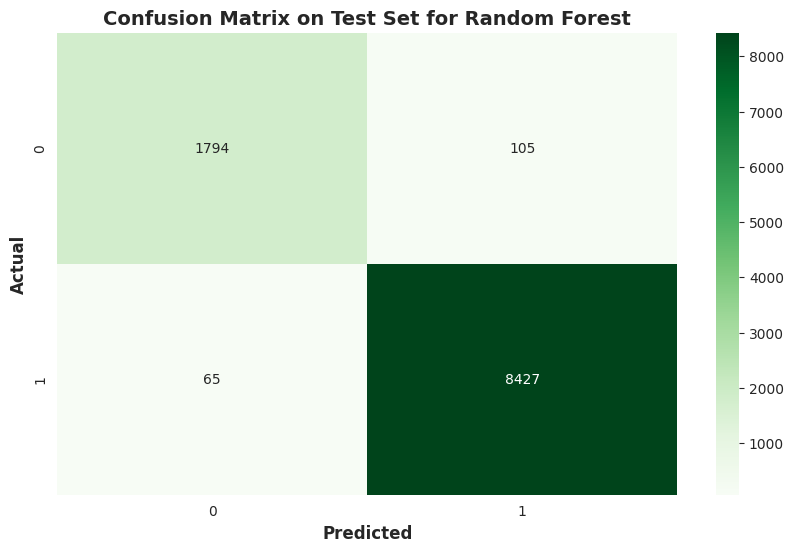

In [ ]:
# Confusion Matrix on Test Set (Random Forest)

plt.figure(figsize=(10, 6))
conf_matrix_test = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix on Test Set for Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Predicted", fontsize=12, fontweight='bold')
plt.ylabel("Actual", fontsize=12, fontweight='bold')
plt.show()


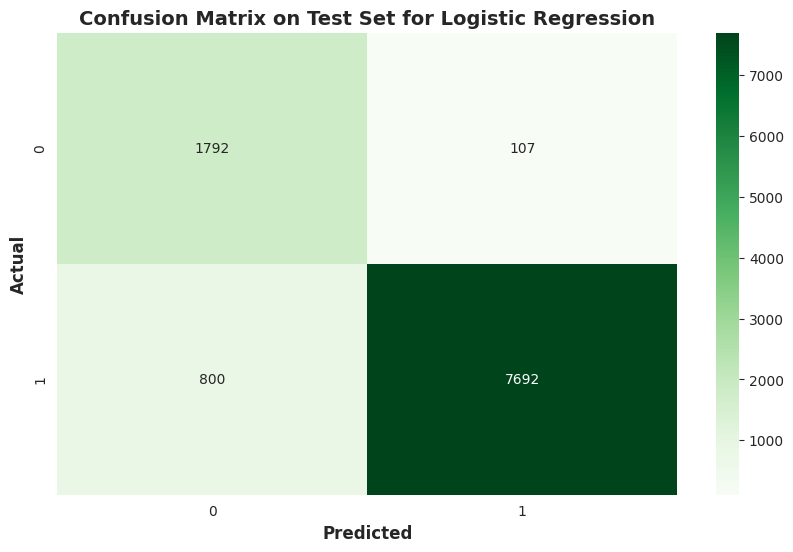

In [ ]:
# Confusion Matrix on Test Set (Logistic Regression)

plt.figure(figsize=(10, 6))
conf_matrix_test = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix on Test Set for Logistic Regression", fontsize=14, fontweight='bold')
plt.xlabel("Predicted", fontsize=12, fontweight='bold')
plt.ylabel("Actual", fontsize=12, fontweight='bold')
plt.show()

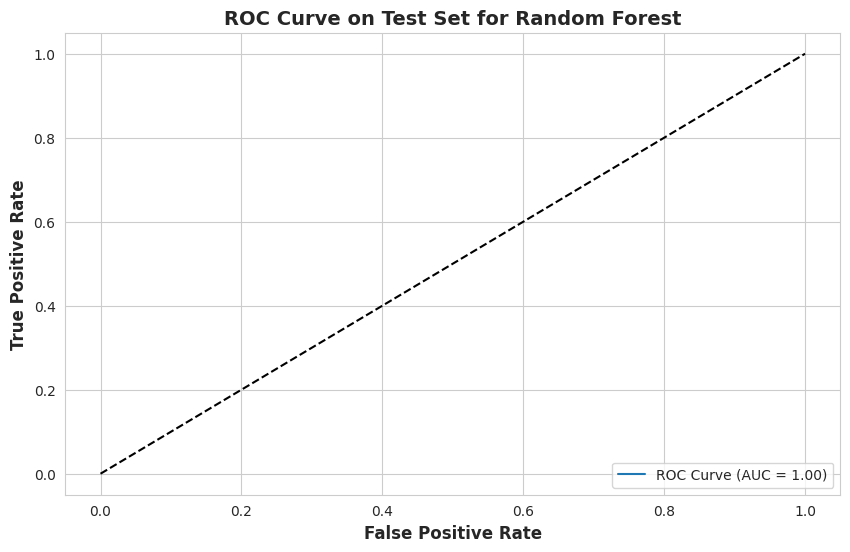

Test ROC AUC Score: 0.9961048430924176


In [ ]:
# ROC Curve on Test Set for Random Forest

roc_auc_test = roc_auc_score(y_test, y_test_proba_rf[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba_rf[:, 1], pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label="ROC Curve (AUC = %0.2f)" % roc_auc_test)
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve on Test Set for Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

print("Test ROC AUC Score:", roc_auc_test)

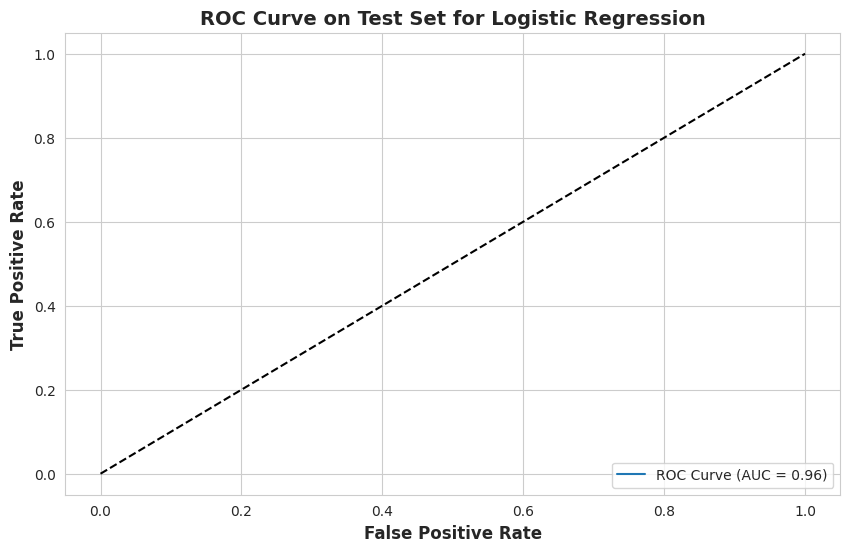

Test ROC AUC Score: 0.9611491359336557


In [ ]:
# ROC Curve on Test Set for Logistic Regression

roc_auc_test = roc_auc_score(y_test, y_test_proba_lr[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba_lr[:, 1], pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label="ROC Curve (AUC = %0.2f)" % roc_auc_test)
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve on Test Set for Logistic Regression", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

print("Test ROC AUC Score:", roc_auc_test)

**CREATE A SUMMARY TABLE FOR THE METRICS**

In [ ]:
# Collect metrics for both models and datasets
metrics_list = []

# Random Forest metrics on Validation Set
metrics_list.append({
    'Model': 'Random Forest',
    'Dataset': 'Validation Set',
    'Accuracy': val_accuracy,
    'Precision': val_precision,
    'Recall': val_recall,
    'F1-Score': val_f1,
    'Log Loss': val_log_loss,
    'ROC AUC': val_roc_auc_rf
})

# Random Forest metrics on Test Set
metrics_list.append({
    'Model': 'Random Forest',
    'Dataset': 'Test Set',
    'Accuracy': test_accuracy_rf,
    'Precision': test_precision_rf,
    'Recall': test_recall_rf,
    'F1-Score': test_f1_rf,
    'Log Loss': test_log_loss_rf,
    'ROC AUC': test_roc_auc_rf
})

# Logistic Regression metrics on Validation Set
metrics_list.append({
    'Model': 'Logistic Regression',
    'Dataset': 'Validation Set',
    'Accuracy': val_accuracy_lr,
    'Precision': val_precision_lr,
    'Recall': val_recall_lr,
    'F1-Score': val_f1_lr,
    'Log Loss': val_log_loss_lr,
    'ROC AUC': val_roc_auc_lr
})

# Logistic Regression metrics on Test Set
metrics_list.append({
    'Model': 'Logistic Regression',
    'Dataset': 'Test Set',
    'Accuracy': test_accuracy_lr,
    'Precision': test_precision_lr,
    'Recall': test_recall_lr,
    'F1-Score': test_f1_lr,
    'Log Loss': test_log_loss_lr,
    'ROC AUC': test_roc_auc_lr
})

In [ ]:
# Create a DataFrame from the list of metrics
metrics_df = pd.DataFrame(metrics_list)

In [ ]:
# Round the metric values for better readability
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss', 'ROC AUC']] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss', 'ROC AUC']].round(4)


In [ ]:
# Display the summary table
print("\nSummary of Evaluation Metrics for Both Models:")

print(metrics_df)


Summary of Evaluation Metrics for Both Models:
                 Model         Dataset  Accuracy  Precision  Recall  F1-Score  \
0        Random Forest  Validation Set    0.9844     0.9893  0.9916    0.9905   
1        Random Forest        Test Set    0.9836     0.9877  0.9923    0.9900   
2  Logistic Regression  Validation Set    0.9064     0.9862  0.8981    0.9401   
3  Logistic Regression        Test Set    0.9127     0.9863  0.9058    0.9443   

   Log Loss  ROC AUC  
0    0.0908   0.9957  
1    0.0861   0.9961  
2    0.2602   0.9594  
3    0.2505   0.9611  


In [ ]:
##Plot Comparison of the models

# Melt the DataFrame for plotting
metrics_long = metrics_df.melt(id_vars=['Model', 'Dataset'], var_name='Metric', value_name='Value')


In [ ]:
# Filter out Log Loss for separate plotting
metrics_no_logloss = metrics_long[metrics_long['Metric'] != 'Log Loss']

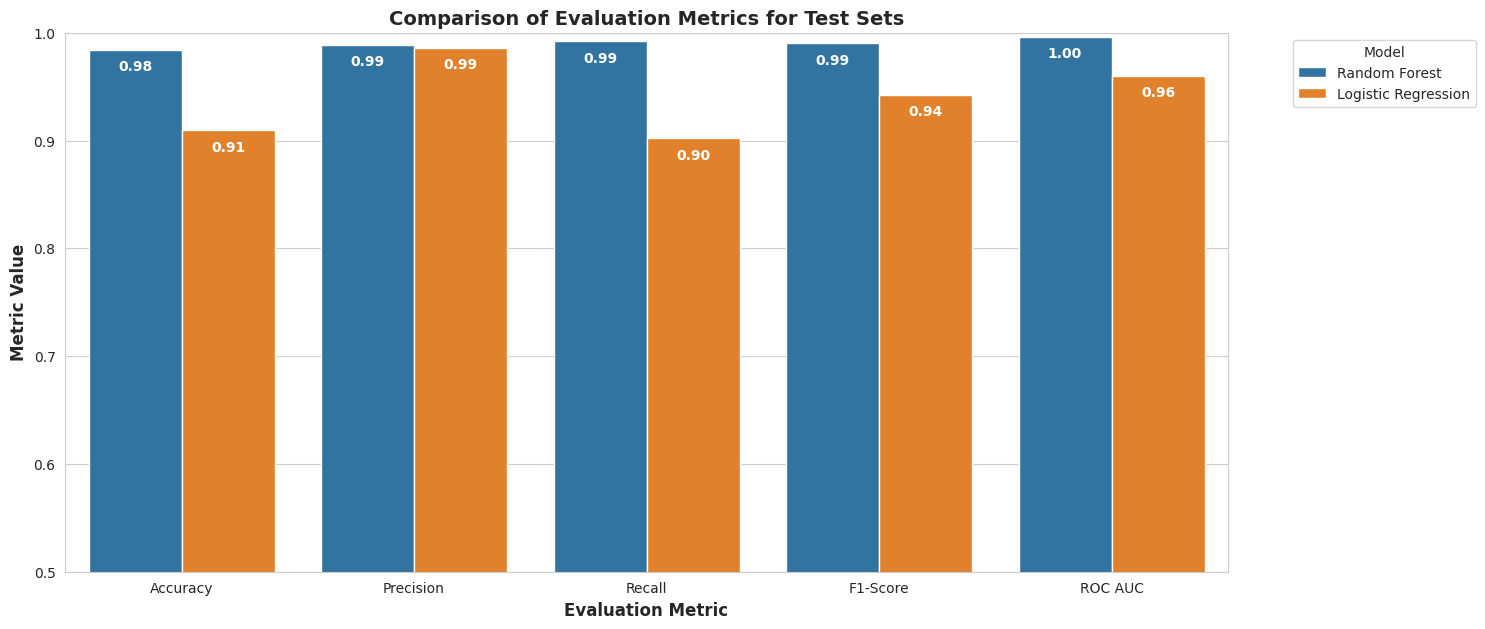

In [ ]:
# Create a bar plot for Accuracy, Precision, Recall, F1-Score, ROC AUC
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(
    data=metrics_no_logloss,
    x='Metric',
    y='Value',
    hue='Model',
    ci=None,
    ax=ax
)

ax.set_title(
    'Comparison of Evaluation Metrics for Test Sets',
    fontsize=14,
    fontweight='bold'
)
ax.set_ylabel('Metric Value', fontsize=12, fontweight='bold')
ax.set_xlabel('Evaluation Metric', fontsize=12, fontweight='bold')
ax.set_ylim(0.5, 1.0)

# Adjust the legend to be outside the plot
ax.legend(
    title='Model',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Adjust the layout to make room for the legend
fig.subplots_adjust(right=0.9)

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width() / 2., height),
        xytext=(0, -12),
        textcoords='offset points',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight= 'bold'

    )

plt.show()


In [ ]:
# Create a bar plot for Log Loss
metrics_logloss = metrics_long[metrics_long['Metric'] == 'Log Loss']

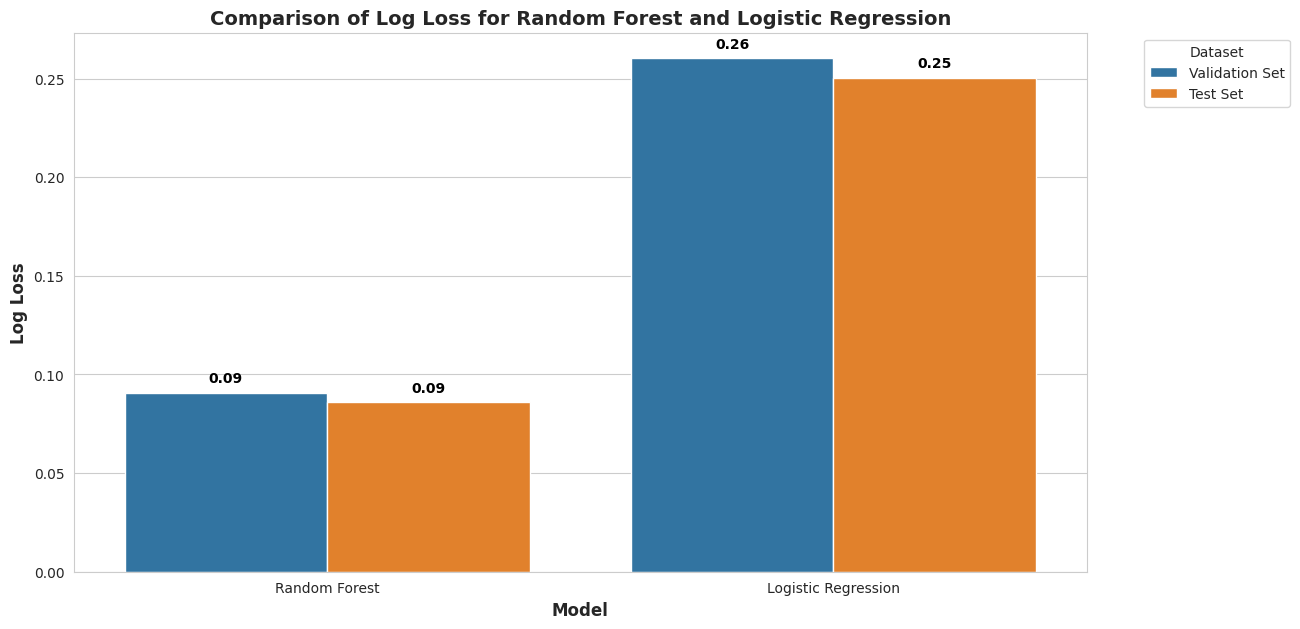

In [ ]:
# Show the plot for the Log loss created for both models

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(
    data=metrics_logloss,
    x='Model',
    y='Value',
    hue='Dataset',
    ci=None,
    ax=ax
)

ax.set_title(
    'Comparison of Log Loss for Random Forest and Logistic Regression',
    fontsize=14,
    fontweight='bold'
)
ax.set_ylabel('Log Loss', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')

# Adjust the legend to be outside the plot
ax.legend(
    title='Dataset',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Adjust the layout to make room for the legend
fig.subplots_adjust(right=0.8)

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(
            f'{height:.2f}',
            xy=(p.get_x() + p.get_width() / 2., height),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            va='bottom',
            color='black',
            fontsize=10,
            fontweight='bold'
        )

plt.show()


Random Forest outperforms Logistic Regression in terms of log loss on both the validation and test sets. This demonstrates that the Random Forest model has a stronger predictive capability, producing well-calibrated probability outputs with lower uncertainty.
The consistent log loss of 0.09 for the Random Forest model across the validation and test sets suggests that it is not overfitting and maintains good generalizability.
Logistic Regression has a higher log loss, which indicates less confidence in its predicted probabilities, potentially resulting in a less reliable model for certain decision-making processes.

**Feature Importance Visualization**

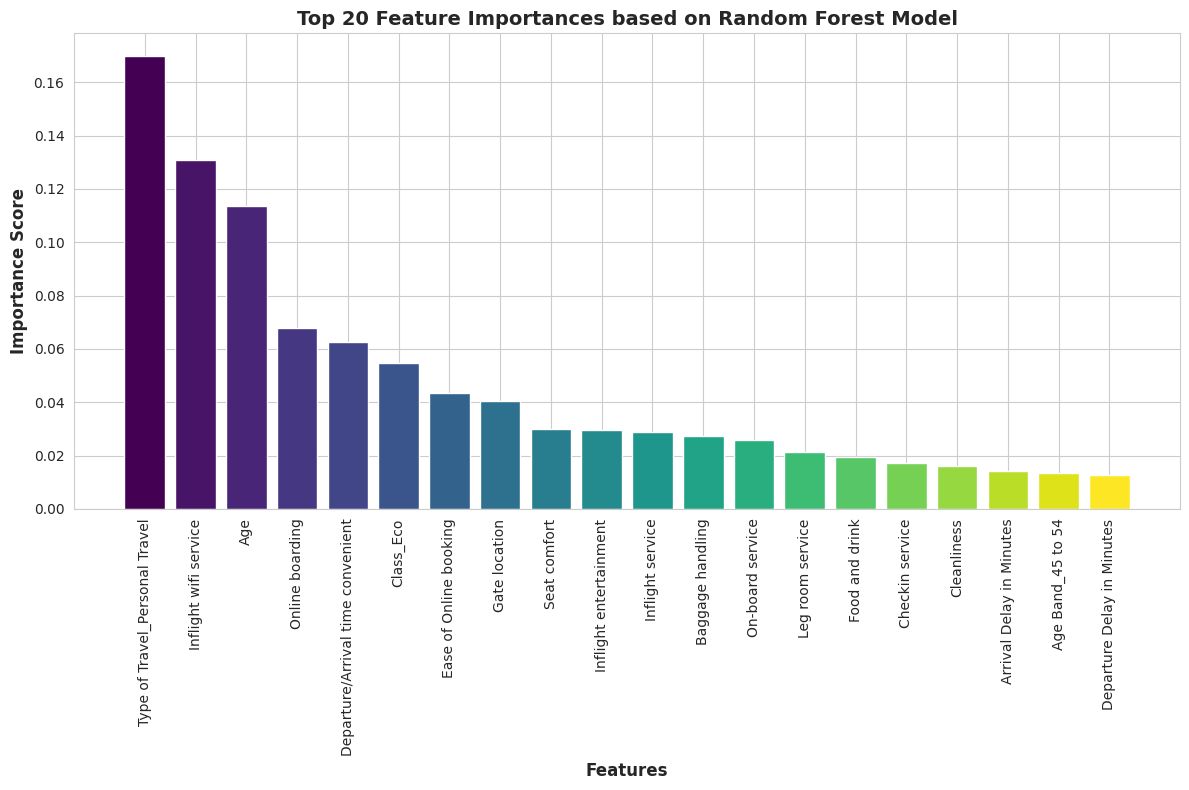

In [ ]:
# Set the number of top features to display
top_n = 20

# Get feature importances from the model
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top N features
top_indices = indices[:top_n]
top_feature_names = X.columns[top_indices]
top_importances = importances[top_indices]

# Create a colormap for the bars
colors = cm.viridis(np.linspace(0, 1, top_n))

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances based on Random Forest Model", fontsize=14, fontweight='bold')
bars = plt.bar(range(len(top_importances)), top_importances, align="center", color=colors)
plt.xticks(range(len(top_importances)), top_feature_names, rotation=90)
plt.xlabel("Features", fontsize=12, fontweight='bold')
plt.ylabel("Importance Score", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**The plot above offers valuable insights into the factors impacting passenger satisfaction.**

**Evaluation Metrics:**

- Accuracy (98% vs. 91%):

1. Random Forest: The model shows an impressive accuracy of 98%, indicating that it correctly classifies the test data 98% of the time.
2. Logistic Regression: The accuracy is lower at 91%, suggesting it is less reliable in classification compared to the Random Forest model.

- Precision (99% vs. 90%):

1. Random Forest: High precision (99%) shows that when the model predicts a positive class, it is correct 99% of the time, reflecting its capability to minimize false positives.
2. Logistic Regression: Precision drops to 90%, indicating a greater proportion of false positives compared to the Random Forest model.

- Recall (99% vs. 94%):

1. Random Forest: The model achieves a recall of 99%, meaning it successfully identifies 99% of actual positive cases in the dataset, showing its ability to minimize false negatives.
2. Logistic Regression: A recall of 94% shows a slightly weaker ability to identify all positive cases but is still fairly robust.

- F1-Score (99% vs. 94%):

1. Random Forest: The F1-score of 99% demonstrates a balanced performance between precision and recall, ensuring the model performs well in scenarios requiring both accuracy and recall.
2. Logistic Regression: The F1-score of 94% indicates a solid, though not as strong, performance in balancing precision and recall.

- ROC AUC (1.00 vs. 0.96):

1. Random Forest: A perfect ROC AUC score of 1.00 implies that the model has exceptional discriminative ability, distinguishing between positive and negative classes without error.
2. Logistic Regression: With an ROC AUC of 0.96, the model shows strong performance but does not achieve the same level of discrimination as the Random Forest.

**Model Performance Analysis:**

The Random Forest model outperforms the Logistic Regression model across all metrics (Accuracy, Precision, Recall, F1-Score, and ROC AUC), showing it is the superior model suitable for this task. The high accuracy, precision, recall, and F1-score indicate that the Random Forest model is highly effective at making correct predictions and minimizing both false positives and false negatives.
The Logistic Regression model, while still performing well, shows relatively lower metrics, indicating it may not be as reliable in classification for this particular task.

**Business Implications:**

1. Reliability in Predictions: The Random Forest model can be confidently used for predicting outcomes due to its high performance, leading to more reliable decision-making.
2. Targeted Action: The high recall ensures that most positive cases are identified, allowing for targeted measures to address specific needs or opportunities.
3. Balanced Resource Management: With an outstanding balance of precision and recall, the Random Forest model can optimize resources by reducing false positives and negatives, enhancing operational efficiency.